# Segundo Examen Argumentativo (Simulación)
## Viviana Alanis Fraige | A01236316

### Pregunta 1. Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Seleccione la funcion (a o b): a
Ingrese el valor de a: inf
Ingrese el valor de b: -inf
Ingrese el tamaño de la muestra (n): 10000


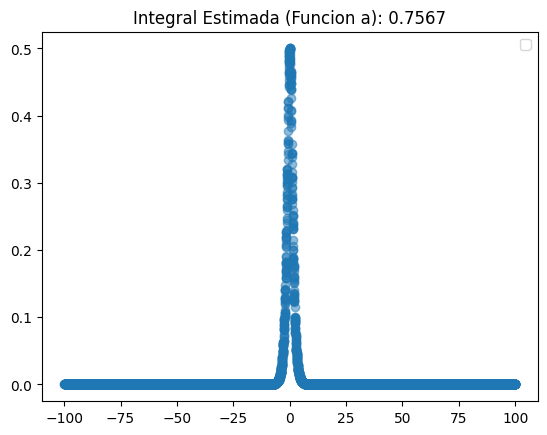

Valores aleatorios generados:
[-66.9369645  -91.88600962 -73.99953498 ...   1.13367018 -50.52575507
  74.60921745]
Alturas:
[8.50443922e-30 1.24283381e-40 7.28467689e-33 ... 2.91639669e-01
 1.14010114e-22 3.95939258e-33]
Areas:
99.99636433191313
Resultado de la integral:
0.7567119409309164


In [2]:
def funcion_a(x):  # funcion a
    return 1 / (np.exp(x) + np.exp(-x))

def funcion_b(x): # funcion b
    return 2 / (np.exp(x) + np.exp(-x))

def montecarlo_integral(funcion, a, b, n):
    if np.isinf(a) and np.isinf(b):
        # Si a y b son infinito, elige un rango grande simetrico alrededor de cero
        x_muestra = np.random.uniform(-100, 100, n)
    else:
        x_muestra = np.random.uniform(a, b, n)

    y_muestra = funcion(x_muestra)

    if np.isinf(a) and np.isinf(b):
        # ajustamos el area para un rango infinito
        area = 200 * np.max(y_muestra)
    else:
        area = (b - a) * np.max(y_muestra)

    integral_estimada = area * (1/n) * np.sum(y_muestra)

    return x_muestra, y_muestra, area, integral_estimada

# le pedimos al usuario que seleccione una funcion (a o b)
opcion = input("Seleccione la funcion (a o b): ")

while opcion.lower() not in ['a', 'b']: # bucle para que si el usuario pone algun otra cosa lo vuelva a preguntar h
    print("Error, elija 'a' o 'b'.")
    opcion = input("Seleccione la funcion (a o b): ")

if opcion.lower() == 'a':
    funcion_seleccionada = funcion_a
elif opcion.lower() == 'b':
    funcion_seleccionada = funcion_b

# le pedimos al usuario que ingrese los valores de a y b
while True: # bucle para que pregunte al usuario valores de a y b, siendo b < a
    try:
        a = input("Ingrese el valor de a: ")
        b = input("Ingrese el valor de b: ")

        if a.lower() == '-inf':
            a = -np.inf
        else:
            a = float(a)

        if b.lower() == 'inf':
            b = np.inf
        else:
            b = float(b)

        if not np.isinf(a) and not np.isinf(b) and b >= a:
            raise ValueError("b debe ser estrictamente menor que a.")
        break
    except ValueError as e:
        print(f"Error: {e}")

# le pedimos al usuario que ingrese el tamaño de la muestra n
while True:
    try:
        n = int(input("Ingrese el tamaño de la muestra (n): "))
        if n <= 0:
            raise ValueError("n debe ser un entero positivo")
        break
    except ValueError as e:
        print(f"Error: {e}")

# calcula la integral de la funcion seleccionada por el usuario
x_muestra, y_muestra, area, integral_estimada = montecarlo_integral(funcion_seleccionada, a, b, n)

# para visualizar grafica de la funcion y resultados
plt.plot(x_muestra, y_muestra, 'o', alpha=0.5)
plt.title(f'Integral Estimada (Funcion {opcion}): {integral_estimada:.4f}')
plt.legend()
plt.show()

# parametros de salida
print("Valores aleatorios generados:")
print(x_muestra)
print("Alturas:")
print(y_muestra)
print("Areas:")
print(area)
print("Resultado de la integral:")
print(integral_estimada)
